## Lectura de datos

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", None, "display.max_columns", None)
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
tProductos = pd.read_csv('/content/drive/MyDrive/Reto IA Periodo2/Datos/tProducto.csv')
tVentas = pd.read_csv('/content/drive/MyDrive/Reto IA Periodo2/Datos/tVenta.csv')
tClientes = pd.read_csv('/content/drive/MyDrive/Reto IA Periodo2/Datos/tCliente.csv')
tVentasTest = pd.read_csv('/content/drive/MyDrive/Reto IA Periodo2/Datos/Test/tVentaTest.csv')
tProductosTest = pd.read_csv('/content/drive/MyDrive/Reto IA Periodo2/Datos/Test/tProductoTest.csv')

In [ ]:
tMarcas = pd.read_csv('/content/drive/MyDrive/Reto IA Periodo2/Datos/Dimensiones/dimMarca.csv')
tDimensiones = pd.read_csv('/content/drive/MyDrive/Reto IA Periodo2/Datos/Dimensiones/dimContenedor.csv')
dimProductoCat = pd.read_csv('/content/drive/MyDrive/Reto IA Periodo2/Datos/Dimensiones/dimProductoCategoria.csv')
dimProductoTipo = pd.read_csv('/content/drive/MyDrive/Reto IA Periodo2/Datos/Dimensiones/dimProductoTipo.csv')
dimTamano = pd.read_csv('/content/drive/MyDrive/Reto IA Periodo2/Datos/Dimensiones/dimTamano.csv')

In [ ]:
def merge_cols(df, df_add, id):
  df = df.merge(df_add, on=id, how="inner")
  df.drop(columns=[id], axis = 1, inplace= True)
  return df

In [ ]:
from sklearn.preprocessing import StandardScaler

class Scaler():
  def __init__(self, with_mean=True, with_std=True):
    self.scaler = StandardScaler(with_mean=with_mean, with_std=with_std)

  def _check_data(self, data):
    if not isinstance(data, (np.ndarray, pd.DataFrame)):
        raise ValueError("Input data must be a numpy array or pandas DataFrame.")

  def fit_transform(self, data):
    return self.scaler.fit_transform(data)

  def inverse_transform(self, data):
    return self.scaler.inverse_transform(data)


In [ ]:
def prepare_products_df(products_df):
  return_df = products_df.copy()
  return_df = merge_cols(return_df, dimProductoCat, "iIdProductoCategoria")
  return_df = merge_cols(return_df, dimProductoTipo, "iIdProductoTipo")
  return_df = merge_cols(return_df, dimTamano, "iIdTamano")
  return_df = merge_cols(return_df, tDimensiones, "iIdContenedor")

  return return_df

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import joblib
def hot_encode(df, col):
  encoder = OneHotEncoder(handle_unknown = "ignore")
  unique_values = df[col].unique()
  encoder.fit(unique_values.reshape(-1, 1))
  #download encoder
  joblib.dump(encoder, f'encoder_{col}.pkl')
  encoded = encoder.transform(df[col].values.reshape(-1, 1)).toarray()
  encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out([col]))

  df = pd.concat([df, encoded_df], axis=1)
  df = df.drop(col, axis=1)
  return df

def hot_encode_df(df):
  cols = ["sProductoCategoria", "sProductoTipo", "sTamano", "sContenedor", "GlobalFlavor", "BrandGrouper"]
  for col in cols:
    df = hot_encode(df, col)
  cols_to_erase = ["iIdMarca", "iIdSabor", "iIdClusterProducto", "Material_desc", "BrandPresRet", "ProdKey",	"Presentation",	"MLSize",	"Pack",	"Ncb",	"SegAg",	"SegDet",	"GlobalCategory",	"GlobalSubcategory",	"dPrimeraVenta", "bViejo", "bExitoso"]
  df.drop(columns=cols_to_erase, axis = 1, inplace=True)
  return df

In [ ]:
mergedTProductos = prepare_products_df(tProductos)
mergedTProductos["test"] = 0

mergedTProductosTest = prepare_products_df(tProductosTest)
mergedTProductosTest["test"] = 1

mergedTProductos = pd.concat([mergedTProductos, mergedTProductosTest]).reset_index(drop=True)

t_productos = hot_encode_df(mergedTProductos)
t_productos.head()

Material  Productos_Por_Empaque  bReturnability  test  \
0      9465                      6               0     0   
1     14450                      6               0     0   
2      1088                      4               0     0   
3      2142                      6               0     0   
4       623                     12               0     0   

   sProductoCategoria_AGUA  sProductoCategoria_AGUA MINERAL CON SABOR  \
0                      1.0                                        0.0   
1                      0.0                                        0.0   
2                      1.0                                        0.0   
3                      1.0                                        0.0   
4                      0.0                                        0.0   

   sProductoCategoria_AGUA SALUDABLE  sProductoCategoria_BEBIDAS ALTERNATIVAS  \
0                                0.0                                      0.0   
1                                1.0                                      0.0   
2                                0.0                                      0.0   
3                                0.0                                      0.0   
4                                0.0                                      0.0   

   sProductoCategoria_BEBIDAS CON ALCOHOL  sProductoCategoria_CAFES  \
0                                     0.0                       0.0   
1                                     0.0                       0.0   
2                                     0.0                       0.0   
3                                     0.0                       0.0   
4                                     0.0                       0.0   

   sProductoCategoria_JUGOS Y NECTARES  sProductoCategoria_LACTEOS  \
0                                  0.0                         0.0   
1                                  0.0                         0.0   
2                                  0.0                         0.0   
3                                  0.0                         0.0   
4                                  0.0                         0.0   

   sProductoCategoria_REFRESCOS  sProductoTipo_AGUA FUNCIONAL  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           1.0                           0.0   

   sProductoTipo_AGUA MINERAL  sProductoTipo_AGUA PURIFICADA  \
0                         0.0                            0.0   
1                         0.0                            0.0   
2                         0.0                            1.0   
3                         1.0                            0.0   
4                         0.0                            0.0   

   sProductoTipo_AGUA SABORIZADA  sProductoTipo_BEBIDA ALCOHOLICA  \
0                            1.0                              0.0   
1                            0.0                              0.0   
2                            0.0                              0.0   
3                            0.0                              0.0   
4                            0.0                              0.0   

   sProductoTipo_BEBIDAS DE SOYA  sProductoTipo_BEBIDAS ENERGETICAS  \
0                            0.0                                0.0   
1                            0.0                                0.0   
2                            0.0                                0.0   
3                            0.0                                0.0   
4                            0.0                                0.0   

   sProductoTipo_BEBIDAS INFANTILES  sProductoTipo_BEBIDAS REFRESCANTES  \
0                               0.0                                 0.0   
1                               0.0                                 0.0   
2                        

In [ ]:
tVentasProductosTrain = t_productos[t_productos["test"] == 0].drop(columns=["test"], axis = 1).reset_index(drop=True)
tVentasProductosTrain.head()

Material  Productos_Por_Empaque  bReturnability  sProductoCategoria_AGUA  \
0      9465                      6               0                      1.0   
1     14450                      6               0                      0.0   
2      1088                      4               0                      1.0   
3      2142                      6               0                      1.0   
4       623                     12               0                      0.0   

   sProductoCategoria_AGUA MINERAL CON SABOR  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   sProductoCategoria_AGUA SALUDABLE  sProductoCategoria_BEBIDAS ALTERNATIVAS  \
0                                0.0                                      0.0   
1                                1.0                                      0.0   
2                                0.0                                      0.0   
3                                0.0                                      0.0   
4                                0.0                                      0.0   

   sProductoCategoria_BEBIDAS CON ALCOHOL  sProductoCategoria_CAFES  \
0                                     0.0                       0.0   
1                                     0.0                       0.0   
2                                     0.0                       0.0   
3                                     0.0                       0.0   
4                                     0.0                       0.0   

   sProductoCategoria_JUGOS Y NECTARES  sProductoCategoria_LACTEOS  \
0                                  0.0                         0.0   
1                                  0.0                         0.0   
2                                  0.0                         0.0   
3                                  0.0                         0.0   
4                                  0.0                         0.0   

   sProductoCategoria_REFRESCOS  sProductoTipo_AGUA FUNCIONAL  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           1.0                           0.0   

   sProductoTipo_AGUA MINERAL  sProductoTipo_AGUA PURIFICADA  \
0                         0.0                            0.0   
1                         0.0                            0.0   
2                         0.0                            1.0   
3                         1.0                            0.0   
4                         0.0                            0.0   

   sProductoTipo_AGUA SABORIZADA  sProductoTipo_BEBIDA ALCOHOLICA  \
0                            1.0                              0.0   
1                            0.0                              0.0   
2                            0.0                              0.0   
3                            0.0                              0.0   
4                            0.0                              0.0   

   sProductoTipo_BEBIDAS DE SOYA  sProductoTipo_BEBIDAS ENERGETICAS  \
0                            0.0                                0.0   
1                            0.0                                0.0   
2                            0.0                                0.0   
3                            0.0                                0.0   
4                            0.0                                0.0   

   sProductoTipo_BEBIDAS INFANTILES  sProductoTipo_BEBIDAS REFRESCANTES  \
0                               0.0                                 0.0   
1                               0.0                                 0.0   
2                               0.0                          

In [ ]:
tVentasProductosTest = t_productos[t_productos["test"] == 1].drop(columns=["test"], axis = 1).reset_index(drop=True)
tVentasProductosTest.head()

Material  Productos_Por_Empaque  bReturnability  sProductoCategoria_AGUA  \
0     14532                      1               0                      0.0   
1      9366                      6               0                      0.0   
2        26                     12               0                      0.0   
3     14587                      6               0                      0.0   
4     14594                     12               0                      1.0   

   sProductoCategoria_AGUA MINERAL CON SABOR  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   sProductoCategoria_AGUA SALUDABLE  sProductoCategoria_BEBIDAS ALTERNATIVAS  \
0                                0.0                                      0.0   
1                                0.0                                      0.0   
2                                0.0                                      0.0   
3                                0.0                                      0.0   
4                                0.0                                      0.0   

   sProductoCategoria_BEBIDAS CON ALCOHOL  sProductoCategoria_CAFES  \
0                                     0.0                       1.0   
1                                     0.0                       0.0   
2                                     0.0                       0.0   
3                                     0.0                       0.0   
4                                     0.0                       0.0   

   sProductoCategoria_JUGOS Y NECTARES  sProductoCategoria_LACTEOS  \
0                                  0.0                         0.0   
1                                  1.0                         0.0   
2                                  0.0                         0.0   
3                                  0.0                         0.0   
4                                  0.0                         0.0   

   sProductoCategoria_REFRESCOS  sProductoTipo_AGUA FUNCIONAL  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           1.0                           0.0   
3                           1.0                           0.0   
4                           0.0                           0.0   

   sProductoTipo_AGUA MINERAL  sProductoTipo_AGUA PURIFICADA  \
0                         0.0                            0.0   
1                         0.0                            0.0   
2                         0.0                            0.0   
3                         0.0                            0.0   
4                         1.0                            0.0   

   sProductoTipo_AGUA SABORIZADA  sProductoTipo_BEBIDA ALCOHOLICA  \
0                            0.0                              0.0   
1                            0.0                              0.0   
2                            0.0                              0.0   
3                            0.0                              0.0   
4                            0.0                              0.0   

   sProductoTipo_BEBIDAS DE SOYA  sProductoTipo_BEBIDAS ENERGETICAS  \
0                            0.0                                0.0   
1                            0.0                                0.0   
2                            0.0                                0.0   
3                            0.0                                0.0   
4                            0.0                                0.0   

   sProductoTipo_BEBIDAS INFANTILES  sProductoTipo_BEBIDAS REFRESCANTES  \
0                               0.0                                 0.0   
1                               0.0                                 0.0   
2                               0.0                          

## Entrenamiento de Modelo

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
def r2_metric(y_true, y_pred):
    # Compute the total sum of squares
    total_sum_of_squares = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))

    # Compute the residual sum of squares
    residual_sum_of_squares = tf.reduce_sum(tf.square(y_true - y_pred))

    # Compute R² score
    r2 = 1 - (residual_sum_of_squares / (total_sum_of_squares + tf.keras.backend.epsilon()))

    return r2

# Prediccion de productos

In [ ]:
tVentasProductosMedia = tVentas.groupby("Material")["uni_box"].mean().reset_index()
tVentasProductosMediaTest = tVentasTest.groupby("Material")["uni_box"].mean().reset_index()

tVentasProductosMedia.rename(columns={"uni_box": "uni_box_media"}, inplace=True)
tVentasProductosMediaTest.rename(columns={"uni_box": "uni_box_media"}, inplace=True)

tVentasProductos = tVentasProductosTrain.merge(tVentasProductosMedia, on="Material", how="inner")

## Prediccion de venta promedio de producto


In [ ]:
tVentasProductosNoMonth = tVentasProductos.copy()
tVentasProductosTestNoMonth = tVentasProductosTest.merge(tVentasProductosMediaTest, on="Material", how="inner")
tVentasProductosNoMonth.head()

Material  Productos_Por_Empaque  bReturnability  sProductoCategoria_AGUA  \
0      9465                      6               0                      1.0   
1     14450                      6               0                      0.0   
2      1088                      4               0                      1.0   
3      2142                      6               0                      1.0   
4       623                     12               0                      0.0   

   sProductoCategoria_AGUA MINERAL CON SABOR  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   sProductoCategoria_AGUA SALUDABLE  sProductoCategoria_BEBIDAS ALTERNATIVAS  \
0                                0.0                                      0.0   
1                                1.0                                      0.0   
2                                0.0                                      0.0   
3                                0.0                                      0.0   
4                                0.0                                      0.0   

   sProductoCategoria_BEBIDAS CON ALCOHOL  sProductoCategoria_CAFES  \
0                                     0.0                       0.0   
1                                     0.0                       0.0   
2                                     0.0                       0.0   
3                                     0.0                       0.0   
4                                     0.0                       0.0   

   sProductoCategoria_JUGOS Y NECTARES  sProductoCategoria_LACTEOS  \
0                                  0.0                         0.0   
1                                  0.0                         0.0   
2                                  0.0                         0.0   
3                                  0.0                         0.0   
4                                  0.0                         0.0   

   sProductoCategoria_REFRESCOS  sProductoTipo_AGUA FUNCIONAL  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           1.0                           0.0   

   sProductoTipo_AGUA MINERAL  sProductoTipo_AGUA PURIFICADA  \
0                         0.0                            0.0   
1                         0.0                            0.0   
2                         0.0                            1.0   
3                         1.0                            0.0   
4                         0.0                            0.0   

   sProductoTipo_AGUA SABORIZADA  sProductoTipo_BEBIDA ALCOHOLICA  \
0                            1.0                              0.0   
1                            0.0                              0.0   
2                            0.0                              0.0   
3                            0.0                              0.0   
4                            0.0                              0.0   

   sProductoTipo_BEBIDAS DE SOYA  sProductoTipo_BEBIDAS ENERGETICAS  \
0                            0.0                                0.0   
1                            0.0                                0.0   
2                            0.0                                0.0   
3                            0.0                                0.0   
4                            0.0                                0.0   

   sProductoTipo_BEBIDAS INFANTILES  sProductoTipo_BEBIDAS REFRESCANTES  \
0                               0.0                                 0.0   
1                               0.0                                 0.0   
2                               0.0                          

In [ ]:
tVentasProductosTestNoMonth.head()

Material  Productos_Por_Empaque  bReturnability  sProductoCategoria_AGUA  \
0     14532                      1               0                      0.0   
1      9366                      6               0                      0.0   
2        26                     12               0                      0.0   
3     14587                      6               0                      0.0   
4     14594                     12               0                      1.0   

   sProductoCategoria_AGUA MINERAL CON SABOR  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   sProductoCategoria_AGUA SALUDABLE  sProductoCategoria_BEBIDAS ALTERNATIVAS  \
0                                0.0                                      0.0   
1                                0.0                                      0.0   
2                                0.0                                      0.0   
3                                0.0                                      0.0   
4                                0.0                                      0.0   

   sProductoCategoria_BEBIDAS CON ALCOHOL  sProductoCategoria_CAFES  \
0                                     0.0                       1.0   
1                                     0.0                       0.0   
2                                     0.0                       0.0   
3                                     0.0                       0.0   
4                                     0.0                       0.0   

   sProductoCategoria_JUGOS Y NECTARES  sProductoCategoria_LACTEOS  \
0                                  0.0                         0.0   
1                                  1.0                         0.0   
2                                  0.0                         0.0   
3                                  0.0                         0.0   
4                                  0.0                         0.0   

   sProductoCategoria_REFRESCOS  sProductoTipo_AGUA FUNCIONAL  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           1.0                           0.0   
3                           1.0                           0.0   
4                           0.0                           0.0   

   sProductoTipo_AGUA MINERAL  sProductoTipo_AGUA PURIFICADA  \
0                         0.0                            0.0   
1                         0.0                            0.0   
2                         0.0                            0.0   
3                         0.0                            0.0   
4                         1.0                            0.0   

   sProductoTipo_AGUA SABORIZADA  sProductoTipo_BEBIDA ALCOHOLICA  \
0                            0.0                              0.0   
1                            0.0                              0.0   
2                            0.0                              0.0   
3                            0.0                              0.0   
4                            0.0                              0.0   

   sProductoTipo_BEBIDAS DE SOYA  sProductoTipo_BEBIDAS ENERGETICAS  \
0                            0.0                                0.0   
1                            0.0                                0.0   
2                            0.0                                0.0   
3                            0.0                                0.0   
4                            0.0                                0.0   

   sProductoTipo_BEBIDAS INFANTILES  sProductoTipo_BEBIDAS REFRESCANTES  \
0                               0.0                                 0.0   
1                               0.0                                 0.0   
2                               0.0                          

In [ ]:
cols_to_erase = ["Material"]
tVentasProductosNoMonth = tVentasProductosNoMonth.drop(columns=cols_to_erase, axis = 1)
tVentasProductosTestNoMonth = tVentasProductosTestNoMonth.drop(columns=cols_to_erase, axis = 1)

In [ ]:
tVentasProductosNoMonth.head()

Productos_Por_Empaque  bReturnability  sProductoCategoria_AGUA  \
0                      6               0                      1.0   
1                      6               0                      0.0   
2                      4               0                      1.0   
3                      6               0                      1.0   
4                     12               0                      0.0   

   sProductoCategoria_AGUA MINERAL CON SABOR  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   sProductoCategoria_AGUA SALUDABLE  sProductoCategoria_BEBIDAS ALTERNATIVAS  \
0                                0.0                                      0.0   
1                                1.0                                      0.0   
2                                0.0                                      0.0   
3                                0.0                                      0.0   
4                                0.0                                      0.0   

   sProductoCategoria_BEBIDAS CON ALCOHOL  sProductoCategoria_CAFES  \
0                                     0.0                       0.0   
1                                     0.0                       0.0   
2                                     0.0                       0.0   
3                                     0.0                       0.0   
4                                     0.0                       0.0   

   sProductoCategoria_JUGOS Y NECTARES  sProductoCategoria_LACTEOS  \
0                                  0.0                         0.0   
1                                  0.0                         0.0   
2                                  0.0                         0.0   
3                                  0.0                         0.0   
4                                  0.0                         0.0   

   sProductoCategoria_REFRESCOS  sProductoTipo_AGUA FUNCIONAL  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           1.0                           0.0   

   sProductoTipo_AGUA MINERAL  sProductoTipo_AGUA PURIFICADA  \
0                         0.0                            0.0   
1                         0.0                            0.0   
2                         0.0                            1.0   
3                         1.0                            0.0   
4                         0.0                            0.0   

   sProductoTipo_AGUA SABORIZADA  sProductoTipo_BEBIDA ALCOHOLICA  \
0                            1.0                              0.0   
1                            0.0                              0.0   
2                            0.0                              0.0   
3                            0.0                              0.0   
4                            0.0                              0.0   

   sProductoTipo_BEBIDAS DE SOYA  sProductoTipo_BEBIDAS ENERGETICAS  \
0                            0.0                                0.0   
1                            0.0                                0.0   
2                            0.0                                0.0   
3                            0.0                                0.0   
4                            0.0                                0.0   

   sProductoTipo_BEBIDAS INFANTILES  sProductoTipo_BEBIDAS REFRESCANTES  \
0                               0.0                                 0.0   
1                               0.0                                 0.0   
2                               0.0                                 0.0   
3                               0.0           

In [ ]:
print(len(tVentasProductosNoMonth.columns) == len(tVentasProductosTest.columns))

True


#### Entrenamiento de la red neuronal

In [ ]:
# Entrenar una red neuronal y una regresion linear para obtener los resultados
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MSE
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsolutePercentageError
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from tensorflow.keras.callbacks import TensorBoard


In [ ]:
x_train = tVentasProductosNoMonth.drop(columns=["uni_box_media"])
x_test = tVentasProductosTestNoMonth.drop(columns=["uni_box_media"])

y_train = tVentasProductosNoMonth.uni_box_media
y_test = tVentasProductosTestNoMonth.uni_box_media

y_train = tf.reshape(y_train, (-1, 1))
y_test = tf.reshape(y_test, (-1, 1))

x_train.head()

Productos_Por_Empaque  bReturnability  sProductoCategoria_AGUA  \
0                      6               0                      1.0   
1                      6               0                      0.0   
2                      4               0                      1.0   
3                      6               0                      1.0   
4                     12               0                      0.0   

   sProductoCategoria_AGUA MINERAL CON SABOR  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   sProductoCategoria_AGUA SALUDABLE  sProductoCategoria_BEBIDAS ALTERNATIVAS  \
0                                0.0                                      0.0   
1                                1.0                                      0.0   
2                                0.0                                      0.0   
3                                0.0                                      0.0   
4                                0.0                                      0.0   

   sProductoCategoria_BEBIDAS CON ALCOHOL  sProductoCategoria_CAFES  \
0                                     0.0                       0.0   
1                                     0.0                       0.0   
2                                     0.0                       0.0   
3                                     0.0                       0.0   
4                                     0.0                       0.0   

   sProductoCategoria_JUGOS Y NECTARES  sProductoCategoria_LACTEOS  \
0                                  0.0                         0.0   
1                                  0.0                         0.0   
2                                  0.0                         0.0   
3                                  0.0                         0.0   
4                                  0.0                         0.0   

   sProductoCategoria_REFRESCOS  sProductoTipo_AGUA FUNCIONAL  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           1.0                           0.0   

   sProductoTipo_AGUA MINERAL  sProductoTipo_AGUA PURIFICADA  \
0                         0.0                            0.0   
1                         0.0                            0.0   
2                         0.0                            1.0   
3                         1.0                            0.0   
4                         0.0                            0.0   

   sProductoTipo_AGUA SABORIZADA  sProductoTipo_BEBIDA ALCOHOLICA  \
0                            1.0                              0.0   
1                            0.0                              0.0   
2                            0.0                              0.0   
3                            0.0                              0.0   
4                            0.0                              0.0   

   sProductoTipo_BEBIDAS DE SOYA  sProductoTipo_BEBIDAS ENERGETICAS  \
0                            0.0                                0.0   
1                            0.0                                0.0   
2                            0.0                                0.0   
3                            0.0                                0.0   
4                            0.0                                0.0   

   sProductoTipo_BEBIDAS INFANTILES  sProductoTipo_BEBIDAS REFRESCANTES  \
0                               0.0                                 0.0   
1                               0.0                                 0.0   
2                               0.0                                 0.0   
3                               0.0           

In [ ]:
with tf.device('/device:GPU:0'):
  model = Sequential()
  model.add(Dense(32, activation='relu', input_shape=(x_train.shape[1],)))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(16, activation='linear'))
  model.add(Dense(1))
  _epochs = 20
  model.compile(optimizer=Adam(learning_rate=0.001),
                loss="mse",
                metrics=["mae", "mse", MeanAbsolutePercentageError()])

  history = model.fit(x_train, y_train, epochs=_epochs, batch_size=8, validation_split=0.2, verbose = False)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Text(0.5, 1.0, 'Training and Validation Loss over Epochs')

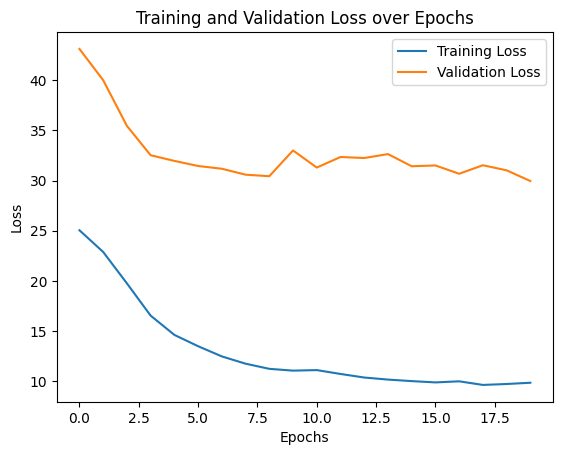

In [ ]:
# Your code here
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss over Epochs')

In [ ]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

y_test_np = y_test.numpy() if isinstance(y_test, tf.Tensor) else y_test
y_pred_np = y_pred if isinstance(y_pred, np.ndarray) else y_pred.numpy()

results = pd.DataFrame({"y_test": y_test_np.flatten(), "y_pred": y_pred_np.flatten()})
results.head(20)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Mean Squared Error: 13.986761663802948


y_test     y_pred
0    1.232800   0.371044
1    0.718050   0.606891
2    0.845505   1.727601
3    0.512174   0.539947
4    1.104162   0.077882
5    8.501960  19.613140
6    0.570605   0.261550
7   20.358426  19.613140
8   -0.105878   1.537681
9    3.082125   0.693596
10   0.880600   4.584079
11   0.673649   0.420135
12   0.826742   0.304462
13   0.678752   0.539612
14   0.652362   0.536842
15  -0.041400   0.444109
16  12.328500   0.371044
17   1.012551   1.867467
18   0.422700   1.162934
19   1.761200   1.608807

## Prediccion de venta promedio por mes


In [ ]:
def get_ventas_productos_month(tVentas, tProductos, cols_to_erase):
  tVentasProductosMedia = tVentas.groupby("Material")["uni_box"].mean().reset_index()
  tVentasProductosMedia.rename(columns={"uni_box": "uni_box_media"}, inplace=True)

  tVentasProductos = tProductos.merge(tVentasProductosMedia, on="Material", how="inner")
  tVentasProductosMonthMean = tVentas.groupby(["Material", "calmonth"])["uni_box"].mean().reset_index()

  tVentasProductosMonth = tVentasProductos.merge(tVentasProductosMonthMean, on="Material", how="inner")
  tVentasProductosMonth.drop(columns=["uni_box_media"], inplace=True)
  tVentasProductosMonth.rename(columns={"uni_box": "uni_box_media_month"}, inplace=True)
  tVentasProductosMonth.head()

  #Change calmonth to only the month
  tVentasProductosMonth["calmonth"] = tVentasProductosMonth["calmonth"].apply(lambda x: x.split("-")[1])

  tVentasProductosMonth = hot_encode(tVentasProductosMonth, "calmonth")
  tVentasProductosMonth.drop(columns=cols_to_erase, inplace=True)
  return tVentasProductosMonth

In [ ]:
tVentas.head(1)

CustomerId  Material    calmonth  uni_box dPrimeraCompraCliente
0   499920078       516  2020-01-01  23.2474            2020-01-01

In [ ]:
tVentasProductosMonth = get_ventas_productos_month(tVentas, t_productos, cols_to_erase + ["test"])

In [ ]:
tVentasProductosMonthTest = get_ventas_productos_month(tVentasTest, tVentasProductosTest, ["Material"])

tVentasProductosMonth["test"] = 0
tVentasProductosMonthTest["test"] = 1
tVentasProductosMonthAll = pd.concat([tVentasProductosMonth, tVentasProductosMonthTest]).reset_index(drop=True)

tVentasProductosMonthTest = tVentasProductosMonthAll[tVentasProductosMonthAll["test"] == 1].drop(columns=["test"]).reset_index(drop=True).fillna(0)
tVentasProductosMonth = tVentasProductosMonthAll[tVentasProductosMonthAll["test"] == 0].drop(columns=["test"]).reset_index(drop=True)

#tVentasProductosMonth.head()
#tVentasProductosMonthTest.head()

In [ ]:
tVentasProductosMonthTest.head()

Productos_Por_Empaque  bReturnability  sProductoCategoria_AGUA  \
0                      1               0                      0.0   
1                      1               0                      0.0   
2                      1               0                      0.0   
3                      1               0                      0.0   
4                      6               0                      0.0   

   sProductoCategoria_AGUA MINERAL CON SABOR  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   sProductoCategoria_AGUA SALUDABLE  sProductoCategoria_BEBIDAS ALTERNATIVAS  \
0                                0.0                                      0.0   
1                                0.0                                      0.0   
2                                0.0                                      0.0   
3                                0.0                                      0.0   
4                                0.0                                      0.0   

   sProductoCategoria_BEBIDAS CON ALCOHOL  sProductoCategoria_CAFES  \
0                                     0.0                       1.0   
1                                     0.0                       1.0   
2                                     0.0                       1.0   
3                                     0.0                       1.0   
4                                     0.0                       0.0   

   sProductoCategoria_JUGOS Y NECTARES  sProductoCategoria_LACTEOS  \
0                                  0.0                         0.0   
1                                  0.0                         0.0   
2                                  0.0                         0.0   
3                                  0.0                         0.0   
4                                  1.0                         0.0   

   sProductoCategoria_REFRESCOS  sProductoTipo_AGUA FUNCIONAL  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

   sProductoTipo_AGUA MINERAL  sProductoTipo_AGUA PURIFICADA  \
0                         0.0                            0.0   
1                         0.0                            0.0   
2                         0.0                            0.0   
3                         0.0                            0.0   
4                         0.0                            0.0   

   sProductoTipo_AGUA SABORIZADA  sProductoTipo_BEBIDA ALCOHOLICA  \
0                            0.0                              0.0   
1                            0.0                              0.0   
2                            0.0                              0.0   
3                            0.0                              0.0   
4                            0.0                              0.0   

   sProductoTipo_BEBIDAS DE SOYA  sProductoTipo_BEBIDAS ENERGETICAS  \
0                            0.0                                0.0   
1                            0.0                                0.0   
2                            0.0                                0.0   
3                            0.0                                0.0   
4                            0.0                                0.0   

   sProductoTipo_BEBIDAS INFANTILES  sProductoTipo_BEBIDAS REFRESCANTES  \
0                               0.0                                 0.0   
1                               0.0                                 0.0   
2                               0.0                                 0.0   
3                               0.0           

In [ ]:
tVentasProductosMonthTest.head()

Productos_Por_Empaque  bReturnability  sProductoCategoria_AGUA  \
0                      1               0                      0.0   
1                      1               0                      0.0   
2                      1               0                      0.0   
3                      1               0                      0.0   
4                      6               0                      0.0   

   sProductoCategoria_AGUA MINERAL CON SABOR  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   sProductoCategoria_AGUA SALUDABLE  sProductoCategoria_BEBIDAS ALTERNATIVAS  \
0                                0.0                                      0.0   
1                                0.0                                      0.0   
2                                0.0                                      0.0   
3                                0.0                                      0.0   
4                                0.0                                      0.0   

   sProductoCategoria_BEBIDAS CON ALCOHOL  sProductoCategoria_CAFES  \
0                                     0.0                       1.0   
1                                     0.0                       1.0   
2                                     0.0                       1.0   
3                                     0.0                       1.0   
4                                     0.0                       0.0   

   sProductoCategoria_JUGOS Y NECTARES  sProductoCategoria_LACTEOS  \
0                                  0.0                         0.0   
1                                  0.0                         0.0   
2                                  0.0                         0.0   
3                                  0.0                         0.0   
4                                  1.0                         0.0   

   sProductoCategoria_REFRESCOS  sProductoTipo_AGUA FUNCIONAL  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

   sProductoTipo_AGUA MINERAL  sProductoTipo_AGUA PURIFICADA  \
0                         0.0                            0.0   
1                         0.0                            0.0   
2                         0.0                            0.0   
3                         0.0                            0.0   
4                         0.0                            0.0   

   sProductoTipo_AGUA SABORIZADA  sProductoTipo_BEBIDA ALCOHOLICA  \
0                            0.0                              0.0   
1                            0.0                              0.0   
2                            0.0                              0.0   
3                            0.0                              0.0   
4                            0.0                              0.0   

   sProductoTipo_BEBIDAS DE SOYA  sProductoTipo_BEBIDAS ENERGETICAS  \
0                            0.0                                0.0   
1                            0.0                                0.0   
2                            0.0                                0.0   
3                            0.0                                0.0   
4                            0.0                                0.0   

   sProductoTipo_BEBIDAS INFANTILES  sProductoTipo_BEBIDAS REFRESCANTES  \
0                               0.0                                 0.0   
1                               0.0                                 0.0   
2                               0.0                                 0.0   
3                               0.0           

In [ ]:
print(len(tVentasProductosMonth.columns) == len(tVentasProductosMonthTest.columns))

True


In [ ]:
x_train = tVentasProductosMonth.drop(columns=["uni_box_media_month"])
x_test = tVentasProductosMonthTest.drop(columns=["uni_box_media_month"])

y_train = tVentasProductosMonth.uni_box_media_month
y_test = tVentasProductosMonthTest.uni_box_media_month

y_train = tf.reshape(y_train, (-1, 1))
y_test = tf.reshape(y_test, (-1, 1))
x_train.head()

Productos_Por_Empaque  bReturnability  sProductoCategoria_AGUA  \
0                      6               0                      1.0   
1                      6               0                      1.0   
2                      6               0                      1.0   
3                      6               0                      1.0   
4                      6               0                      1.0   

   sProductoCategoria_AGUA MINERAL CON SABOR  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   sProductoCategoria_AGUA SALUDABLE  sProductoCategoria_BEBIDAS ALTERNATIVAS  \
0                                0.0                                      0.0   
1                                0.0                                      0.0   
2                                0.0                                      0.0   
3                                0.0                                      0.0   
4                                0.0                                      0.0   

   sProductoCategoria_BEBIDAS CON ALCOHOL  sProductoCategoria_CAFES  \
0                                     0.0                       0.0   
1                                     0.0                       0.0   
2                                     0.0                       0.0   
3                                     0.0                       0.0   
4                                     0.0                       0.0   

   sProductoCategoria_JUGOS Y NECTARES  sProductoCategoria_LACTEOS  \
0                                  0.0                         0.0   
1                                  0.0                         0.0   
2                                  0.0                         0.0   
3                                  0.0                         0.0   
4                                  0.0                         0.0   

   sProductoCategoria_REFRESCOS  sProductoTipo_AGUA FUNCIONAL  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

   sProductoTipo_AGUA MINERAL  sProductoTipo_AGUA PURIFICADA  \
0                         0.0                            0.0   
1                         0.0                            0.0   
2                         0.0                            0.0   
3                         0.0                            0.0   
4                         0.0                            0.0   

   sProductoTipo_AGUA SABORIZADA  sProductoTipo_BEBIDA ALCOHOLICA  \
0                            1.0                              0.0   
1                            1.0                              0.0   
2                            1.0                              0.0   
3                            1.0                              0.0   
4                            1.0                              0.0   

   sProductoTipo_BEBIDAS DE SOYA  sProductoTipo_BEBIDAS ENERGETICAS  \
0                            0.0                                0.0   
1                            0.0                                0.0   
2                            0.0                                0.0   
3                            0.0                                0.0   
4                            0.0                                0.0   

   sProductoTipo_BEBIDAS INFANTILES  sProductoTipo_BEBIDAS REFRESCANTES  \
0                               0.0                                 0.0   
1                               0.0                                 0.0   
2                               0.0                                 0.0   
3                               0.0           

In [ ]:
x_train.shape

(15759, 147)

In [ ]:
with tf.device('/device:GPU:0'):
  model = Sequential()
  model.add(Dense(32, activation='relu', input_shape=(x_train.shape[1],), kernel_regularizer=regularizers.l2(0.001)))
  model.add(Dropout(0.3))
  model.add(BatchNormalization())
  model.add(Dense(8, activation='relu'))
  model.add(Dropout(0.3))
  model.add(BatchNormalization())
  model.add(Dense(4, activation='relu'))
  model.add(Dense(1))

  _epochs = 300

  early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
  reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

  model.compile(optimizer=Adam(learning_rate=0.00001),loss="huber", metrics=["mae", "mse"])

  history = model.fit(x_train, y_train, epochs=_epochs, batch_size=64, validation_split=0.3, verbose = False, callbacks=[early_stopping, reduce_lr])

In [ ]:
# Your code here
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss over Epochs')

In [ ]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

y_test_np = y_test.numpy() if isinstance(y_test, tf.Tensor) else y_test
y_pred_np = y_pred if isinstance(y_pred, np.ndarray) else y_pred.numpy()

results = pd.DataFrame({"y_test": y_test_np.flatten(), "y_pred": y_pred_np.flatten()})
results.head(20)


In [ ]:
if (mse < 8.5):
  model.save("model_month.keras")

In [ ]:
print(len(y_pred[y_pred < 0]))

In [ ]:
tVentasProductosMonth = tVentasProductos.copy()
tVentasProductosMonth.head()
tVentasProductosMonthMean = tVentas.groupby(["Material", "calmonth"])["uni_box"].mean().reset_index()
tVentasProductosMonth = tVentasProductosMonth.merge(tVentasProductosMonthMean, on="Material", how="inner")
tVentasProductosMonth.drop(columns=["uni_box_media"], inplace=True)
tVentasProductosMonth.rename(columns={"uni_box": "uni_box_media_month"}, inplace=True)
#Change calmonth to only the month
tVentasProductosMonth["calmonth"] = tVentasProductosMonth["calmonth"].apply(lambda x: x.split("-")[1])

tVentasProductosMonth = hot_encode(tVentasProductosMonth, "calmonth")
tVentasProductosMonth.drop(columns=cols_to_erase[1:], inplace=True)
tVentasProductosMonth.head(10)

In [ ]:
product_sample = tVentasProductosMonth.sample(1)
product_sample = tVentasProductosMonth[tVentasProductosMonth["Material"] == product_sample["Material"].values[0]]

product_sample = product_sample.head(6)
product_sample

In [ ]:
y_pred = model.predict(product_sample.drop(columns=["uni_box_media_month", "Material"]))

plt.plot(range(len(y_pred)), y_pred)
plt.plot(range(len(y_pred)), product_sample["uni_box_media_month"])
plt.legend(["Predicted", "Actual"])
# plt.ylim([0, max(max(y_pred), max(product_sample["uni_box_media_month"])) + 2])
plt.title("Ventas promedio por mes")
plt.show()

In [ ]:
product_sample